In [53]:
import torch
import soundfile as sf
from asteroid import ConvTasNet
from asteroid.dsp.overlap_add import LambdaOverlapAdd
from asteroid.models import BaseModel
import numpy as np

model = BaseModel.from_pretrained("JorisCos/ConvTasNet_Libri2Mix_sepnoisy_8k")
continuous_nnet = LambdaOverlapAdd(
		nnet=model,  # function to apply to each segment.
		n_src=2,  # number of sources in the output of nnet
		window_size=80000,  # Size of segmenting window
		hop_size=60000,  # segmentation hop size
		window="boxcar",  # Type of the window (see scipy.signal.get_window
		reorder_chunks=False,  # Whether to reorder each consecutive segment.
		enable_grad=False,  # Set gradient calculation on of off (see torch.set_grad_enabled)
)

# Instantiate long wav (1min) that would OOM
wav, fs = sf.read('/home/oneran/Wave-Split-CSU2021/测试数据/test_5.wav')
wav = torch.Tensor(np.expand_dims(np.expand_dims(wav, 0), 0).astype(np.float32), device='cpu')
out_wavs = continuous_nnet.forward(wav)
# # Or on GPU
# continuous_nnet.cuda()
# wav = wav.cuda()
# out_wavs_gpu = continuous_nnet.forward(wav)

In [54]:
sf.write('/home/oneran/Desktop/s1.wav', out_wavs.numpy()[0, 0] / 40000, 8000)
sf.write('/home/oneran/Desktop/s2.wav', out_wavs.numpy()[0, 1] / 40000, 8000)

In [19]:
out_wavs.numpy()[0, 0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

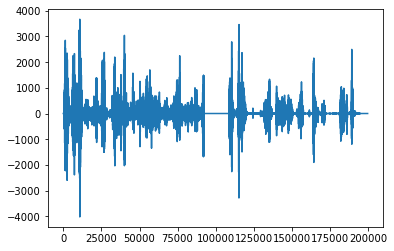

In [41]:
import matplotlib.pyplot as plt
plt.plot(out_wavs[0, 1])


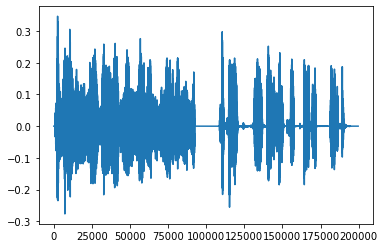

In [40]:
plt.plot(wav[0, 0])

In [26]:
a = torch.randn(1, 1, 500000)
a.dtype

torch.float32